In [71]:
import pandas as pd
import numpy as np
from pathlib import Path
import talib as ta
import matplotlib.pyplot as plt

In [72]:
pd.set_option("display.precision", 2)

In [73]:
path_to_file = Path().cwd().parent / 'data' / 'win.csv'
df = pd.read_csv(path_to_file, index_col='time')

In [74]:
df['ema25'] = ta.EMA(df['close'], 25)
df['upper200'] = df['ema25'] + 200
df['upper300'] = df['ema25'] + 300
df['lower200'] = df['ema25'] - 200
df['lower300'] = df['ema25'] - 300
df.dropna(inplace=True)

In [75]:
df

,open,high,low,close,ema25,upper200,upper300,lower200,lower300
time,,,,,,,,,
2023-01-02 11:00:00,116215.0,116355.0,115785.0,115984.0,117378.08,117578.08,117678.08,117178.08,117078.08
2023-01-02 11:05:00,115984.0,116016.0,115564.0,115752.0,117253.00,117453.00,117553.00,117053.00,116953.00
2023-01-02 11:10:00,115752.0,115876.0,115650.0,115806.0,117141.69,117341.69,117441.69,116941.69,116841.69
2023-01-02 11:15:00,115806.0,115844.0,115424.0,115715.0,117031.94,117231.94,117331.94,116831.94,116731.94
2023-01-02 11:20:00,115715.0,116011.0,115698.0,115967.0,116950.03,117150.03,117250.03,116750.03,116650.03
...,...,...,...,...,...,...,...,...,...
2023-09-13 17:30:00,119490.0,119500.0,119430.0,119465.0,119627.47,119827.47,119927.47,119427.47,119327.47
2023-09-13 17:35:00,119470.0,119520.0,119445.0,119510.0,119618.43,119818.43,119918.43,119418.43,119318.43
2023-09-13 17:40:00,119505.0,119510.0,119465.0,119500.0,119609.32,119809.32,119909.32,119409.32,119309.32


In [76]:
df['upper_channel'] = np.where((df['close'] < df['upper300']) & (df['close'] > df['upper200']), True, False)
df['lower_channel'] = np.where((df['close'] > df['lower300']) & (df['close'] < df['lower200']), True, False)

In [95]:
df.head()

,open,high,low,close,ema25,upper200,upper300,lower200,lower300,upper_channel,lower_channel
time,,,,,,,,,,,
2023-01-02 11:00:00,116215.0,116355.0,115785.0,115984.0,117378.08,117578.08,117678.08,117178.08,117078.08,False,False
2023-01-02 11:05:00,115984.0,116016.0,115564.0,115752.0,117253.00,117453.00,117553.00,117053.00,116953.00,False,False
2023-01-02 11:10:00,115752.0,115876.0,115650.0,115806.0,117141.69,117341.69,117441.69,116941.69,116841.69,False,False
2023-01-02 11:15:00,115806.0,115844.0,115424.0,115715.0,117031.94,117231.94,117331.94,116831.94,116731.94,False,False
2023-01-02 11:20:00,115715.0,116011.0,115698.0,115967.0,116950.03,117150.03,117250.03,116750.03,116650.03,False,False


In [122]:
row_iterator = df.iterrows()
upper_count = 0
lower_count = 0
profits = []
long = False
short = False

for i, row in row_iterator:
    if row['upper_channel']:
        upper_count += 1
        entry_price = row['close']
        short = True
        if i == df.index[-1]:
            break
        while short:
            if i == df.index[-1]:
                break
            i, row = next(row_iterator)
            if row['close'] <= row['ema25']:
                profits.append((entry_price - row['close']) * 0.02 * 5)
                short = False
            
    elif row['lower_channel']:
        lower_count += 1
        entry_price = row['close']
        long = True
        if i == df.index[-1]:
            break
        while long:
            i, row = next(row_iterator)
            if i == df.index[-1]:
                break
            if row['close'] >= row['ema25']:
                profits.append((row['close'] - entry_price) * 0.02 * 5)
                long = False
        
# print('Upper: ', upper_count)
# print('Lower: ', lower_count)

In [123]:
profits = np.array(profits).cumsum()
len(profits)

701

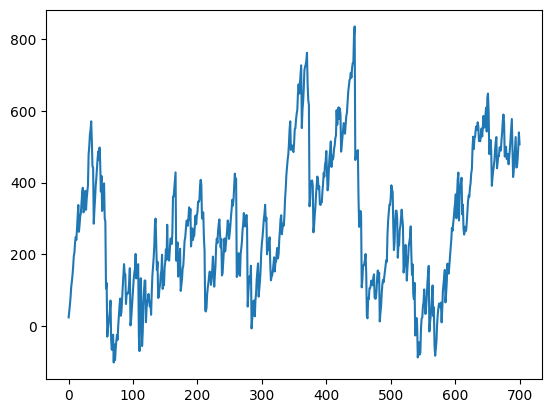

In [126]:
plt.plot(profits);

In [125]:
profits

array([  23.7,   40.4,   59.2,   80.8,  108.8,  123.8,  142. ,  165.1,
        194.7,  204.9,  233.5,  248.1,  240.5,  270.1,  304.6,  337.4,
        262.6,  282.5,  306.8,  314.9,  344.5,  372. ,  385.5,  316.7,
        319.9,  356.5,  376.9,  324.2,  354.3,  374.2,  393. ,  478. ,
        501.1,  533.9,  546.2,  571. ,  516.1,  444.5,  442.3,  285.2,
        323.4,  354.6,  391.7,  412.6,  439.5,  468.1,  486.9,  462.7,
        497.7,  454.1,  375.1,  418.6,  320.7,  353.6,  382.1,  397.7,
        299.8,  291.2,  104.5,  120.1,  -30.1,   -8. ,    7.1,   22.7,
         41. ,   70.6,  -39.2,  -66.7,  -45.7,  -24.7, -102.2,  -52.1,
        -95.6,  -65.4,  -42.3,  -25.1,  -38.6,    1.2,   30.3,   55.6,
         76.1,   28.2,   40.6,   76.6,  109.5,  140.2,  172.4,  143.9,
        144.4,   61. ,   87.9,   91.7,   90.1,   98.1,  121.8,  161. ,
          1.2,   16.8,   45.8,   78.1,  102.3,  130.3,  148. ,  160.4,
        200.8,  132.5,  158.3,  168. ,  172.3,  -27.9,  -70.4,   60.9,
      

## Encontrando distorções do preço

In [44]:
df['delta'] = abs(df['close'] - df['ema25'])

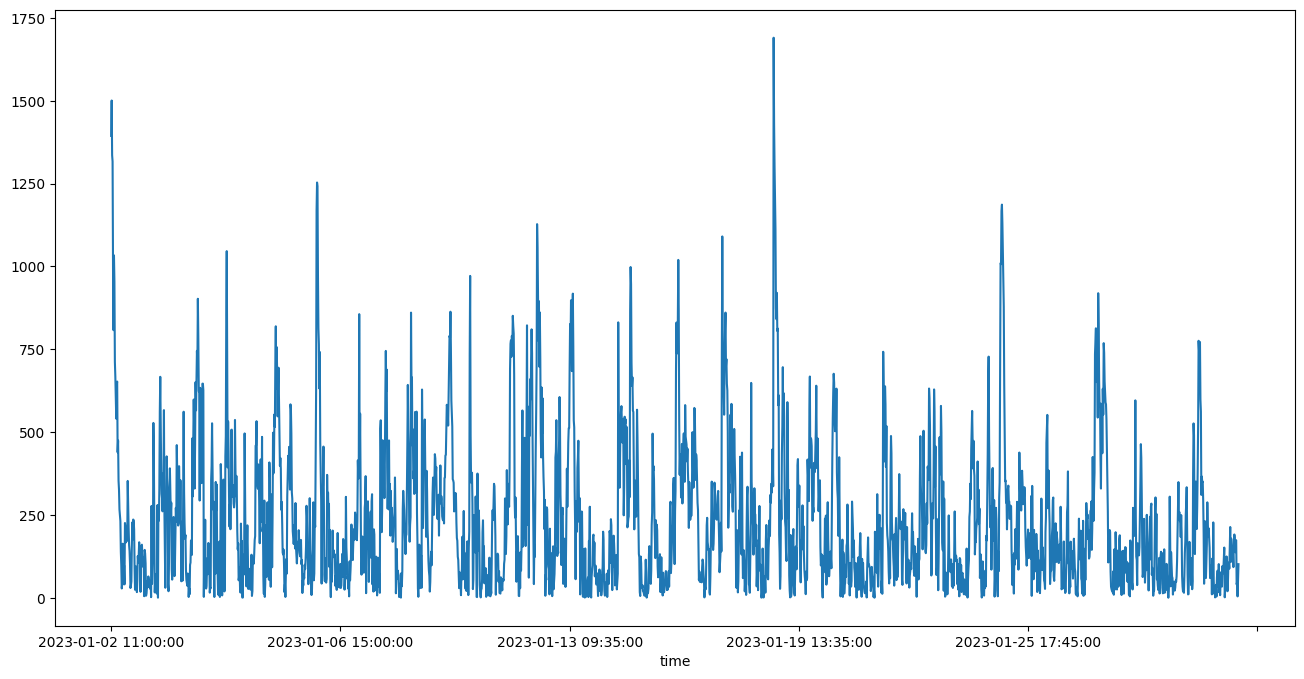

In [68]:
df['delta'].loc['2023-01-00': '2023-02-00'].plot(figsize=(16, 8));